In [17]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census ##

In [2]:
census_filename = "nc-est2014-agesex-res.csv"
full = # load in the census table
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [3]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [4]:
# Make things easier to read by changing the names of the estimate labels
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [5]:
# Sort by age
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493
0,1,3957888,3962123
1,1,2020332,2023253
2,1,1937556,1938870
0,2,4090862,3957772
1,2,2088685,2022502
2,2,2002177,1935270
0,3,4111920,4005190


In [6]:
# Sort by age (another way)
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


## Line Plots ##

In [8]:
# Remove the age totals

no_999 = simple. #

In [9]:
# Look at the largest age and include everything below it

In [10]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


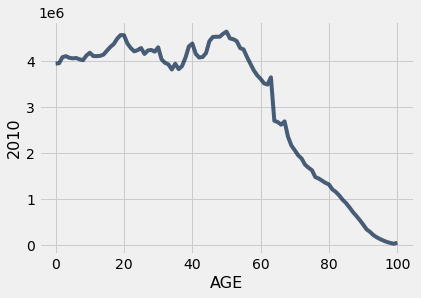

In [11]:
# Lets plot the number of ages during 2010
# Make Age the X-axis and 2010 the y-axis
everyone.plot('AGE', '2010')

In [12]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

In [ ]:
# add a python comment

In [13]:
# print out what the tables is

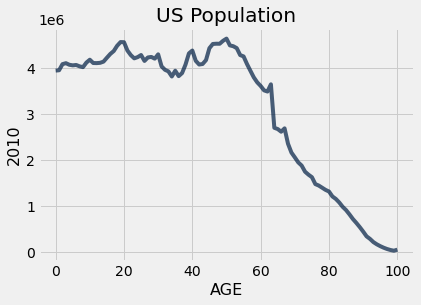

In [14]:
# Add a title to plots
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for COMS1016

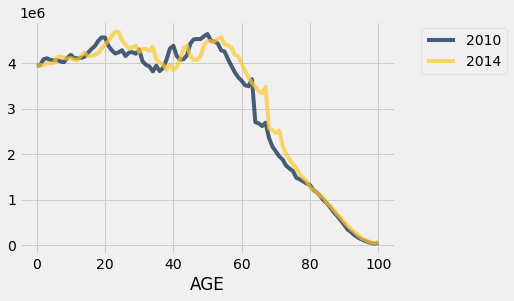

In [15]:
# Age distribution for two different years
# hint just plot AGE
everyone.plot('AGE')

## Males and Females in 2014 ##


In [1]:
# Let's compare male and female counts per age
# no_999 "SEX" codes males as 1 and females as 2
# Get rid of SEX column
males = 
females = 

NameError: name 'no_999' is not defined

In [2]:
# Make a new Table pop_2014 where the columns are:
# Age
# Males: number of males in 2014
# Females: number of females in 2014
pop_2014 = Table().with_columns(
    'Age', #,
    'Males', #,,
    'Females', #,
)
pop_2014

NameError: name 'Table' is not defined

In [3]:
pop_2014.plot('Age')

NameError: name 'pop_2014' is not defined

In [4]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

NameError: name 'pop_2014' is not defined

In [5]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

NameError: name 'np' is not defined

In [6]:
# Add female percent to our table.
# Ad a column names percent female
pop_2014 = ...
pop_2014

Ellipsis

In [7]:
pop_2014.plot('Age', 'Percent female')

AttributeError: 'ellipsis' object has no attribute 'plot'

In [8]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for Data 8

AttributeError: 'ellipsis' object has no attribute 'plot'

## Scatter Plots ##

In [11]:
# Actors and their highest grossing movies
# Read in the table called 'actors.csv'

actors = ...
actors

Ellipsis

In [12]:
actors.scatter('Number of Movies', 'Total Gross')

AttributeError: 'ellipsis' object has no attribute 'scatter'

In [13]:
actors.scatter('Number of Movies', 'Average per Movie')

AttributeError: 'ellipsis' object has no attribute 'scatter'

In [14]:
actors.where('Average per Movie', are.above(400))

AttributeError: 'ellipsis' object has no attribute 'where'

## Bar Charts ##

In [15]:
# Highest grossing movies as of 2017
# Read in table called 'top_movies_2017.csv'
top_movies = ...
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [18]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [19]:
# Convert Gross (Adjusted) to millions of dollars for readability
millions = ...
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,Ellipsis
Star Wars,Fox,460998007,1583483200,1977,Ellipsis
The Sound of Music,Fox,158671368,1266072700,1965,Ellipsis
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,Ellipsis
Titanic,Paramount,658672302,1204368000,1997,Ellipsis
The Ten Commandments,Paramount,65500000,1164590000,1956,Ellipsis
Jaws,Universal,260000000,1138620700,1975,Ellipsis
Doctor Zhivago,MGM,111721910,1103564200,1965,Ellipsis
The Exorcist,Warner Brothers,232906145,983226600,1973,Ellipsis
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,Ellipsis


In [20]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

# Why not?

ValueError: The column 'Millions' contains non-numerical values. A plot cannot be drawn for this column.

In [21]:
top10_adjusted.barh('Title', 'Millions')

ValueError: The column 'Millions' contains non-numerical values. A plot cannot be drawn for this column.